# Import Standard Libraries

In [67]:
import pandas as pd

In [68]:
import matplotlib.pyplot as plt

In [69]:
import numpy as np

In [70]:
import seaborn as sns

In [71]:
import plotly.express as px

## Read Data

In [72]:
df=pd.read_csv("Swiggy Bangalore Outlet Details.csv")
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


## How many features are in datasets

In [73]:
df.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

## Check missing value in datasets

In [74]:
df.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [76]:
df.describe(include="all")

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
count,118,118,118,118,118
unique,115,79,65,13,30
top,La Pino'z Pizza,North Indian,"BTM, BTM",4.1,₹ 300
freq,2,12,13,30,16


## Data Pre-processing & Cleaning

In [77]:
df.duplicated().sum()

0

In [78]:
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


## How many different ratings are in dataset

In [79]:
df["Rating"].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

## Replace '--' rating with Zero(0)

In [80]:
df["Rating"]=df["Rating"].str.replace('--','0').astype(float)

In [81]:
df

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,₹ 219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,₹ 600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,₹ 193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,₹ 200


## How many unique entries for 'cost_for_Two' feature

In [82]:
df["Cost_for_Two"].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [83]:
df["Cost_for_Two"]=df["Cost_for_Two"].apply(lambda x:int(x.strip("₹ ")))

In [84]:
df["Cost_for_Two"].dtype

dtype('int64')

In [85]:
df["Cost_for_Two"].unique()

array([150, 400, 126, 450, 350, 200, 500, 247, 550, 300, 129, 250, 268,
       600, 527, 130, 257, 280, 399, 220, 800, 100, 178, 120, 251, 650,
       132, 153, 219, 193], dtype=int64)

In [86]:
df.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [87]:
df.describe()

,Rating,Cost_for_Two
count,118.000000,118.000000
mean,4.061864,321.008475
std,0.430845,137.286804
min,0.000000,100.000000
25%,4.000000,204.750000
50%,4.100000,300.000000
75%,4.300000,400.000000
max,4.800000,800.000000


In [88]:
df_valid_Ratings=df[df["Rating"]>0]
df_valid_Ratings

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


C:\Users\Ruchi shukla\AppData\Local\Temp\ipykernel_10944\1013357767.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Rating', ylabel='Density'>

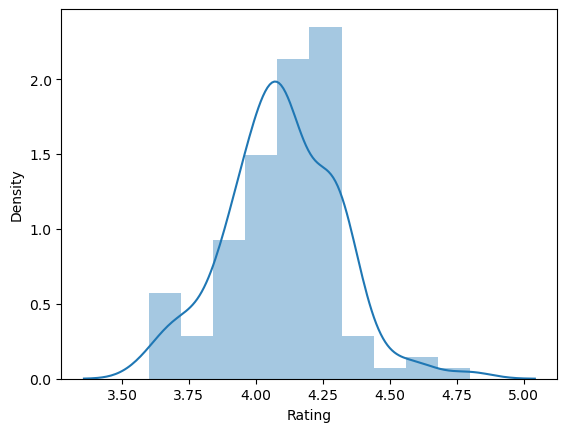

In [89]:
sns.distplot(df_valid_Ratings["Rating"])

#### Conclusion:
- The distribution plot shows that over 50% of restaurants have a rating above 4.1,with a maximum of 4.8 this indicates that most restaurants are performing well and are rated fairly by customer.


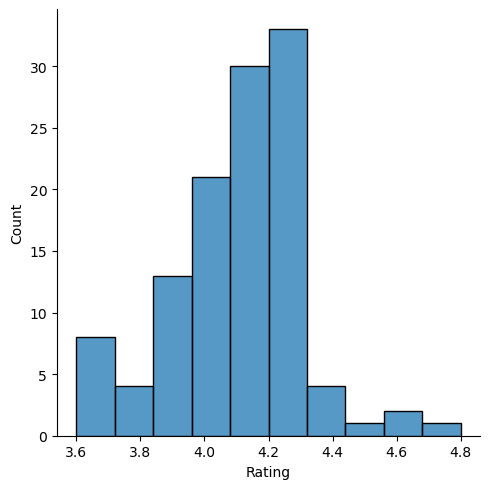

In [90]:
sns.displot(df_valid_Ratings["Rating"])

### Handling features---->Location

In [91]:
df['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

### Locations that contains koramangala

In [92]:
swiggy_Koramangala=df[df['Location'].str.contains(r'Koramangala')]
swiggy_Koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


#### Location that contain HSR

In [93]:
swiggy_HSR=df[df['Location'].str.contains(r'HSR')]
swiggy_HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300
41,Cakewala,Desserts,"HSR, HSR",4.3,450
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300


#### Location that contains BTM

In [94]:
swiggy_BTM=df[df['Location'].str.contains(r'BTM')]
swiggy_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


### As we can see the Resturants are given from only 3 Locations

## Area-Wise Analysis-

### BTM Area

<Axes: xlabel='Rating', ylabel='Count'>

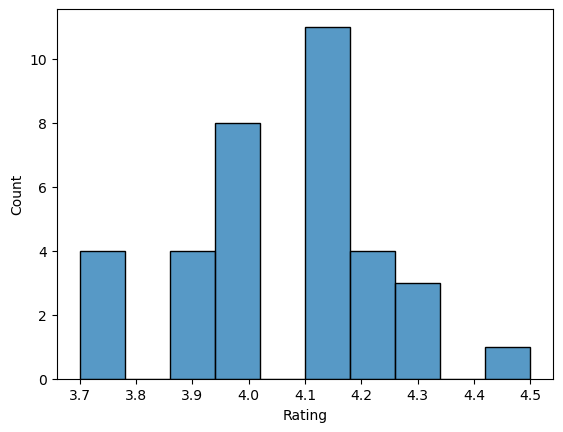

In [95]:
sns.histplot(swiggy_BTM["Rating"],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

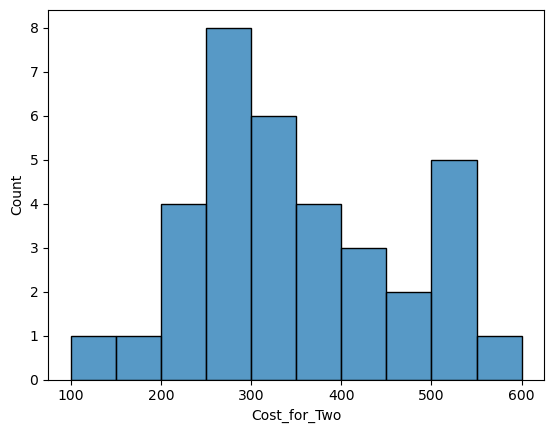

In [96]:
sns.histplot(swiggy_BTM["Cost_for_Two"],bins=10)

### Conclusion
- BTM generally has rating between 4.0 and 4.2,with the estimated cost for two people ranging from 200 to 350,while the maximum cost can go up to 600

<Axes: xlabel='Rating', ylabel='Count'>

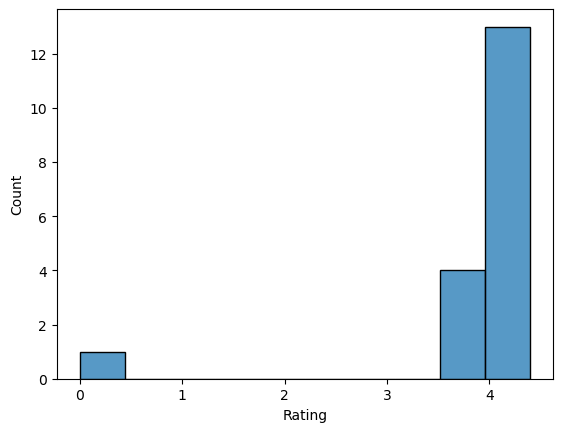

In [97]:
sns.histplot(swiggy_HSR["Rating"],bins=10)

## HSR Area

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

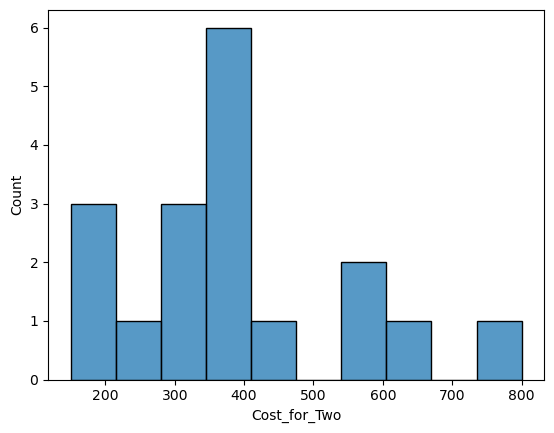

In [98]:
sns.histplot(swiggy_HSR["Cost_for_Two"],bins=10)

### HSR:Most has 4 or above Rating and Approx cost for two people less between 300 to 400(max cost goes upto 800)

<Axes: xlabel='Rating', ylabel='Count'>

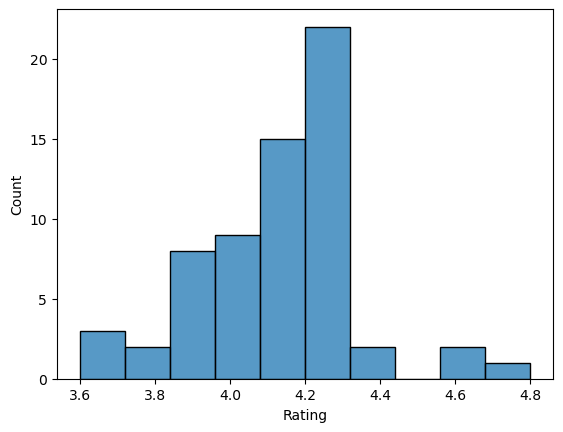

In [100]:
sns.histplot(swiggy_Koramangala["Rating"],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

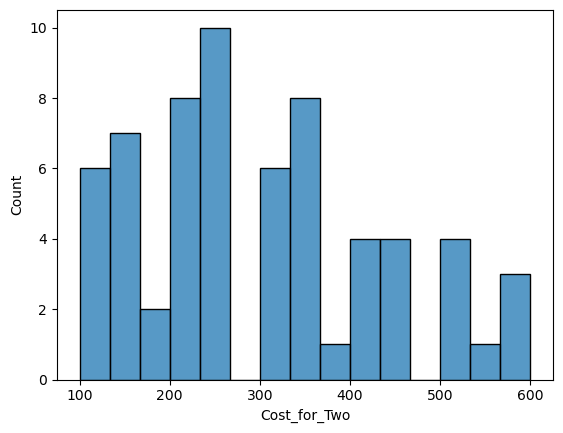

In [101]:
sns.histplot(swiggy_Koramangala["Cost_for_Two"],bins=15)

## Conclusion

### koramangala :most has 4.0 to 4.3 rating and approx cost for two people lies between 200 to 350(max cost goes upto 600)

## Conclusion of Areawise Analysis
Based on the area-wise analysis we can conclude that HSR is the most expensive area.


### Analyse "Approx Cost of 2 People" vs "Rating". Find out the relationship between them.

In [102]:
df_Highest_Rated_Restaurants=df[df["Rating"]>=4.0]
df_Highest_Rated_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


### In This operation we are analyze highly rated restaurants and compare their costs.

In [103]:
df_Highest_Rated_Restaurants=df_Highest_Rated_Restaurants.loc[:,["Shop_Name","Rating","Cost_for_Two"]]
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two
0,Kanti Sweets,4.3,150
1,Mumbai Tiffin,4.4,400
2,Sri Krishna sagar,4.1,126
3,Al Daaz,4.4,400
4,Beijing Bites,4.1,450
...,...,...,...
111,Bowl 99,4.4,200
114,Savoury Restaurant,4.1,600
115,Royal Treat,4.2,193
116,Thali 99,4.3,200


### Grouping on Shop_Name and Rating

In [104]:
df_Highest_Rated_Restaurants=df_Highest_Rated_Restaurants.groupby(["Shop_Name","Rating",])["Cost_for_Two"].agg("mean")
df_Highest_Rated_Restaurants

Shop_Name                                             Rating
99 VARIETY DOSA AND JUICE-Malli mane food court       4.1       100.0
99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food Court  4.1       200.0
A2B - Adyar Ananda Bhavan                             4.2       450.0
Abhiruchi Hotel                                       4.0       250.0
Al Daaz                                               4.4       400.0
                                                                ...  
Venu's Donne Biryani                                  4.3       300.0
WarmOven Cake & Desserts                              4.1       200.0
World of asia                                         4.0       250.0
XO Belgian Waffle                                     4.3       250.0
calicut cafe restaurant                               4.1       280.0
Name: Cost_for_Two, Length: 91, dtype: float64

In [105]:
df_Highest_Rated_Restaurants=df_Highest_Rated_Restaurants.reset_index()
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


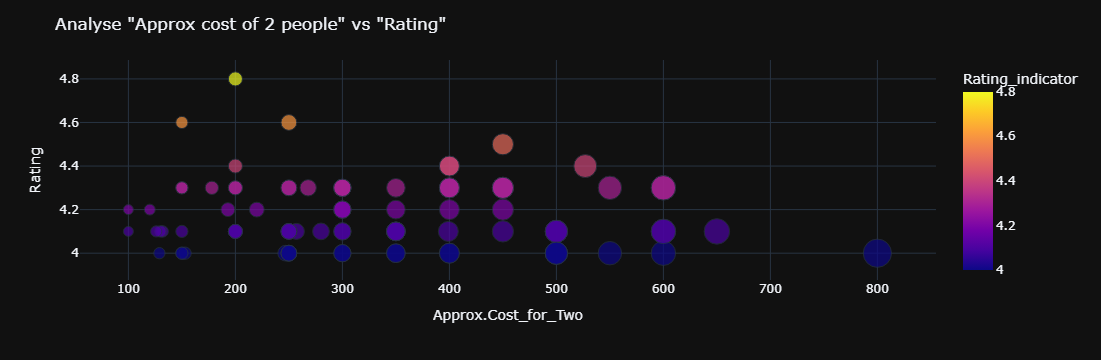

In [106]:
fig=px.scatter(x=df_Highest_Rated_Restaurants["Cost_for_Two"],y=df_Highest_Rated_Restaurants["Rating"],color=df_Highest_Rated_Restaurants["Rating"],
               size=df_Highest_Rated_Restaurants["Cost_for_Two"],labels={"x":"Approx.Cost_for_Two","y":"Rating","color":"Rating_indicator"} )
fig.update_layout(template="plotly_dark",title='Analyse "Approx cost of 2 people" vs "Rating"')
fig.show()

## Conclusion:
- From this scatter plot,we can observe that larger bubbles correspond to higher prices,while smaller bubbles indicate lower prices.
- Additionally,we can conclude that Affordable/Budget-friendly restaurants tend to have excellent ratings.
- Same we can see for Approx.cost of "200","150","250",and"450",the Rating were "4.8","4.6",and"4.5" respectively.
- This suggests that people prefer budget-friendly restaurants,possibly due to their combination of affordability and good quality cuisine.
- On the otherhand, a few expensive restaurantstends to have lower ratings despite their higher cost.
-  Restaurants which costs around "600" to "800" for Two people are having the Ratings in between"4.0"to"4.1"which is to less as compared to 
Affordable/Budgeted Restaurants.
- in conclusion,this scatter plot highlights a preference for affordable restaurants that offer quality food at reasonable prices,while Expensive restaurants 
do not always gurantee higher ratings.

In [107]:
df_Affordable_Restaurants=df[(df["Cost_for_Two"]<=500)&(df["Rating"]>=4.0)]
df_Affordable_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


### Analyze Affordable/Budgeted and Highest Rated Restaurant of Bangalore:

In [108]:
df_Affordable_Restaurants=df_Affordable_Restaurants.groupby(["Shop_Name","Rating",])["Cost_for_Two"].agg("mean")
df_Affordable_Restaurants=df_Affordable_Restaurants.reset_index()
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [109]:
df_Affordable_Restaurants.sort_values(by=["Rating"],ascending=False,inplace=True)
df_Affordable_Restaurants

,Shop_Name,Rating,Cost_for_Two
41,Khichdi Experiment,4.8,200.0
54,Natural Ice Cream,4.6,150.0
21,Corner House Ice Cream,4.6,250.0
20,Chinese Bae,4.5,450.0
50,Mumbai Tiffin,4.4,400.0
...,...,...,...
55,New Tasty Cafeteria,4.0,350.0
53,Nandhana Palace,4.0,500.0
52,Nanda's,4.0,400.0
45,Maa Di Hatti,4.0,129.0


<Axes: xlabel='Shop_Name', ylabel='Cost_for_Two'>

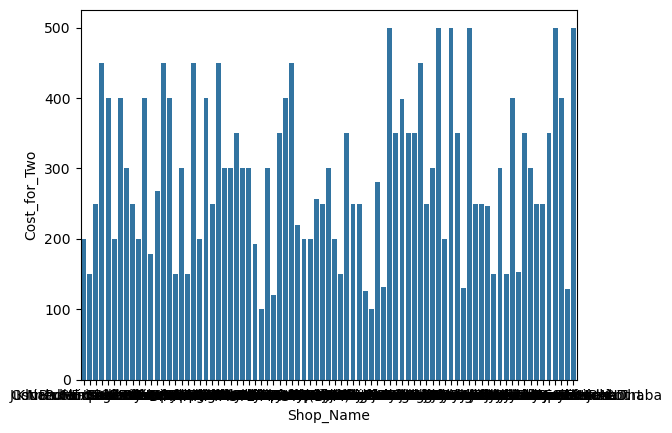

In [110]:
sns.barplot(x=df_Affordable_Restaurants["Shop_Name"],y=df_Affordable_Restaurants["Cost_for_Two"],data=df_Affordable_Restaurants,
           )

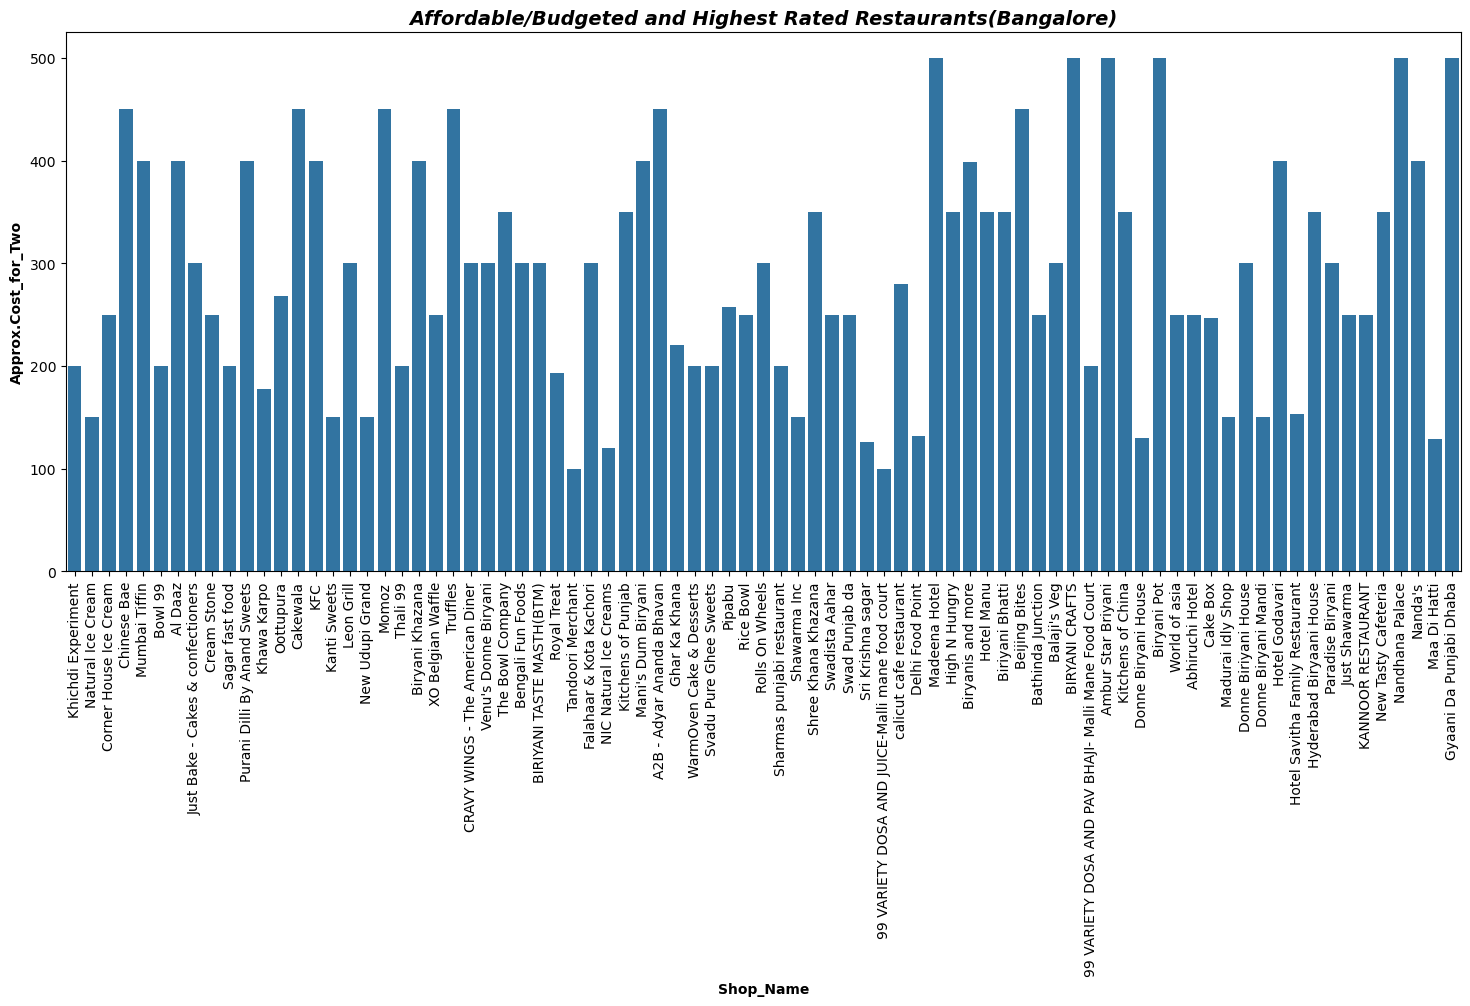

In [111]:
plt.figure(figsize=(18,7))
sns.barplot(x=df_Affordable_Restaurants["Shop_Name"],y=df_Affordable_Restaurants["Cost_for_Two"],data=df_Affordable_Restaurants,
           )
plt.title("Affordable/Budgeted and Highest Rated Restaurants(Bangalore)",fontsize=14,fontweight="bold",fontstyle="italic",
         )
plt.xlabel("Shop_Name",fontsize=10,fontweight="bold")
plt.ylabel("Approx.Cost_for_Two",fontsize=10,fontweight="bold")
plt.xticks(rotation=90)
plt.show()
           

#### Top 15 Cheapest&Highest Rated Restaurants with Approx.cost for 2 people:

In [112]:
df_Cheapest_Restaurants=df_Affordable_Restaurants.sort_values(by="Cost_for_Two",ascending=True)
df_Cheapest_Restaurants

,Shop_Name,Rating,Cost_for_Two
72,Tandoori Merchant,4.2,100.0
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
51,NIC Natural Ice Creams,4.2,120.0
68,Sri Krishna sagar,4.1,126.0
45,Maa Di Hatti,4.0,129.0
...,...,...,...
5,Ambur Star Briyani,4.1,500.0
7,BIRYANI CRAFTS,4.1,500.0
53,Nandhana Palace,4.0,500.0
46,Madeena Hotel,4.1,500.0


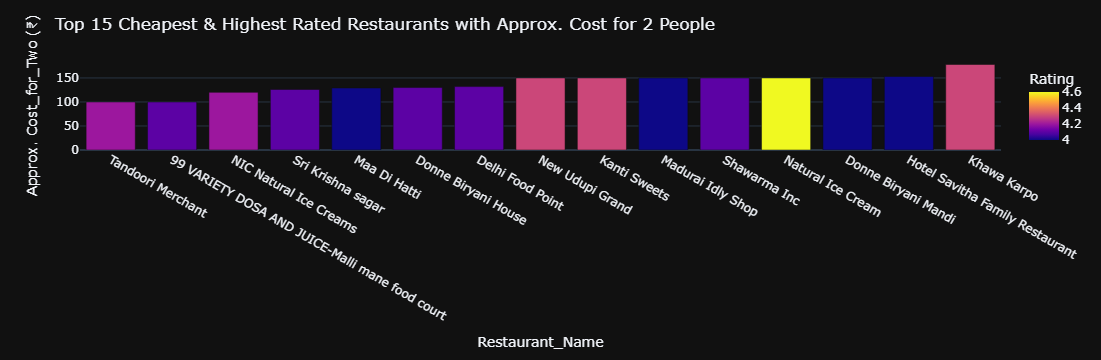

In [113]:
fig = px.bar(
    data_frame=df_Cheapest_Restaurants,
    x=df_Cheapest_Restaurants["Shop_Name"][0:15],
    y=df_Cheapest_Restaurants["Cost_for_Two"][0:15],
    color=df_Cheapest_Restaurants["Rating"][0:15],
    labels={
        "x": "Restaurant_Name",
        "y": "Approx. Cost_for_Two (₹)",
        "color": "Rating",
    }
)
fig.update_layout(
    template="plotly_dark",
    title="Top 15 Cheapest & Highest Rated Restaurants with Approx. Cost for 2 People",
)
#plt.savefig('Top15_Cheapest_but_highest_rated_Restaurants.png')
fig.show()

### Top 15 Expensiv & Highest Rated Restaurants with Approx.cost for 2 people:

In [114]:
df_Expensive_Restaurants=df_Highest_Rated_Restaurants.sort_values(by="Cost_for_Two",ascending=False)
df_Expensive_Restaurants

,Shop_Name,Rating,Cost_for_Two
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


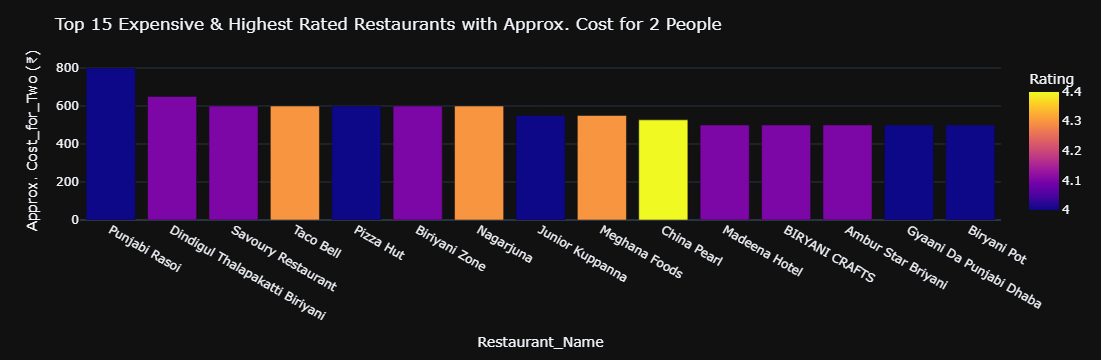

In [115]:
fig = px.bar(
    data_frame=df_Expensive_Restaurants,
    x=df_Expensive_Restaurants["Shop_Name"][0:15],
    y=df_Expensive_Restaurants["Cost_for_Two"][0:15],
    color=df_Expensive_Restaurants["Rating"][0:15],
    labels={
        "x": "Restaurant_Name",
        "y": "Approx. Cost_for_Two (₹)",
        "color": "Rating",
    }
)
fig.update_layout(
    template="plotly_dark",
    title="Top 15 Expensive & Highest Rated Restaurants with Approx. Cost for 2 People",
)
#plt.savefig('Top15_Cheapest_but_highest_rated_Restaurants.png')
fig.show()

# Cuisine Analysis

In [116]:
df["Cuisine"]=df["Cuisine"].str.title()
df["Cuisine"]

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [117]:
df["Cuisine"].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [118]:
freq_dict={}

In [119]:
for i in df["Cuisine"].unique():
    Cuisine_List=i.split(",")

In [120]:
Cuisine_List

['North Indian', ' Chinese', ' Seafood', ' Biryani']

In [121]:
for Cuisine in Cuisine_List:
    Cuisine=Cuisine.lstrip(" ")

In [122]:
Cuisine

'Biryani'

In [123]:
if Cuisine in freq_dict:
    freq_dict[Cuisine]=freq_dict[Cuisine]+1
else:
    freq_dict[Cuisine]=1
print(freq_dict)

{'Biryani': 1}


In [124]:
freq_dict={}
for i in df["Cuisine"].unique():
    Cuisine_List=i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine=Cuisine.lstrip(" ")
        if Cuisine in freq_dict:
            freq_dict[Cuisine]=freq_dict[Cuisine]+1
        else:
            freq_dict[Cuisine]=1
print(freq_dict)
print()
print("Total Records:\t",len(freq_dict))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total Records:	 48


In [125]:
Cuisine=freq_dict.keys()
freq=freq_dict.values()
df_Cuisine_Analysis=pd.DataFrame()

df_Cuisine_Analysis["Cuisine"]=Cuisine
df_Cuisine_Analysis["Count"]=freq
df_Cuisine_Analysis

,Cuisine,Count
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


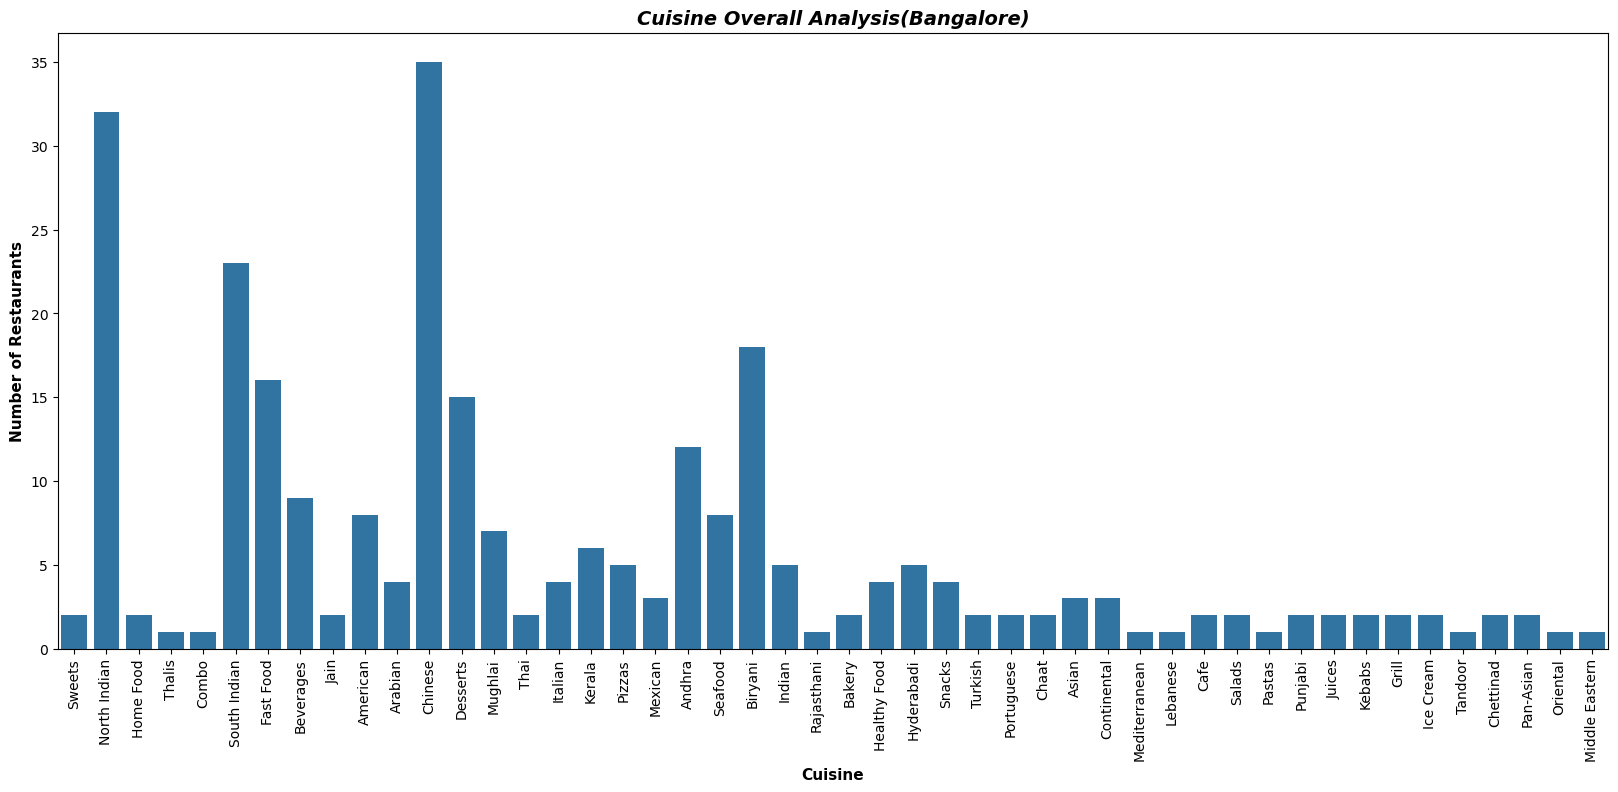

In [126]:
plt.figure(figsize=(20,8))
sns.barplot(
    x=df_Cuisine_Analysis["Cuisine"],
    y=df_Cuisine_Analysis["Count"],
    data=df_Cuisine_Analysis,
)
plt.xticks(rotation=90)
plt.title("Cuisine Overall Analysis(Bangalore)",
          fontsize=14,
          fontweight="bold",
          fontstyle="italic",)
plt.xlabel("Cuisine",fontsize=11,fontweight="bold")
plt.ylabel("Number of Restaurants",fontsize=11,fontweight="bold")
plt.show()

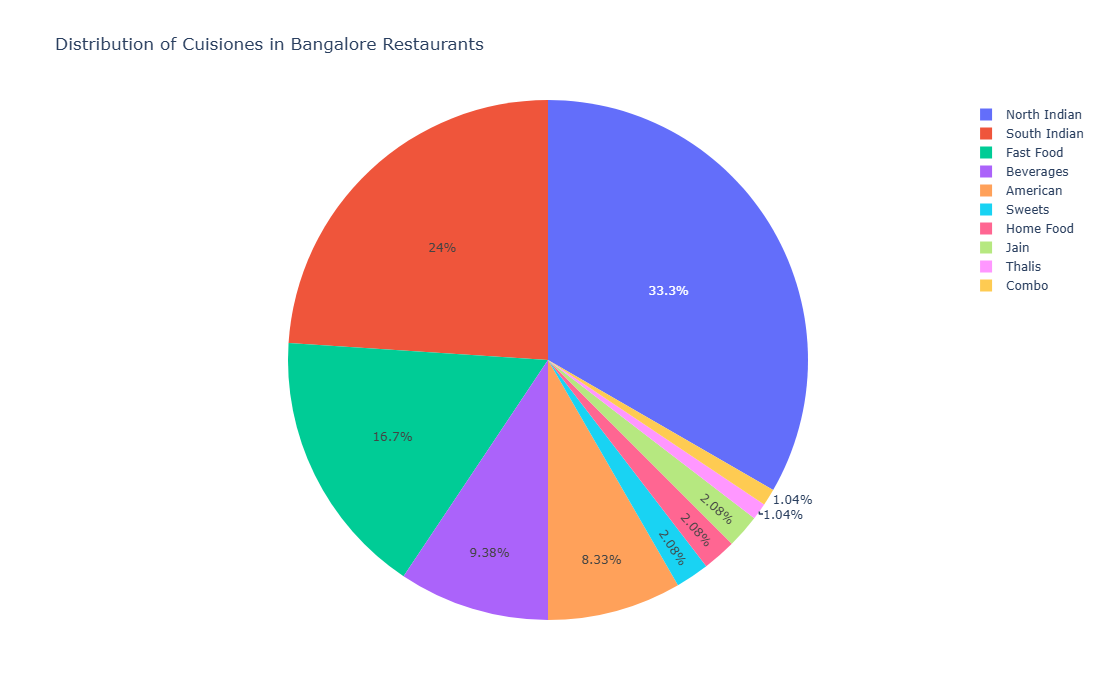

In [127]:
fig=px.pie(
    data_frame=df_Cuisine_Analysis,
    names=df_Cuisine_Analysis["Cuisine"][:10],
    values=df_Cuisine_Analysis["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.show()


## **Conclusion:**

- From the above Visualizations, We can say, **_Most of the Resturants_** sell **"Chinese"** which is around **'12.9%'** followed by **"North Indian"** & **"South Indian"** Cuisines which are around **'11.8%'** & **'8.46%'**.
- So, We can also infer that Most of the people are fond of these Cusines.

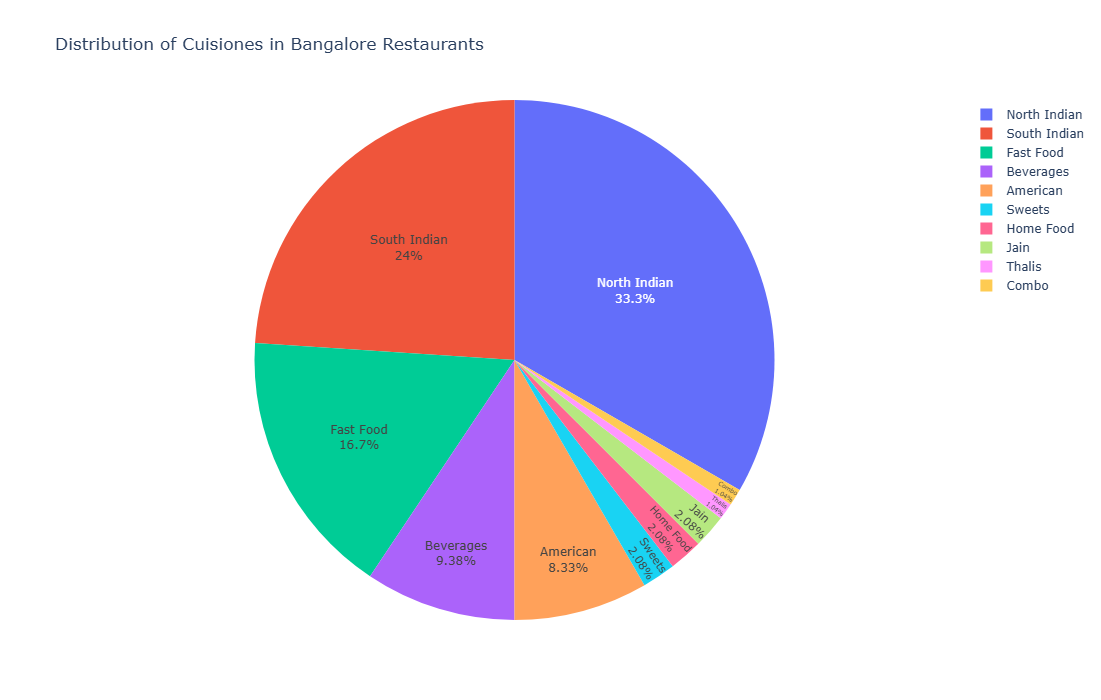

In [128]:
fig=px.pie(
    data_frame=df_Cuisine_Analysis,
    names=df_Cuisine_Analysis["Cuisine"][:10],
    values=df_Cuisine_Analysis["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.update_traces(textposition="inside",textinfo="percent+label")
fig.show()


### Swiggy_Koramanagala

In [130]:
swiggy_Koramangala["Cuisine"].unique()

array(['Sweets', 'South Indian, North Indian, Fast Food, Beverages, Jain',
       'Chinese, Thai', 'North Indian', 'Pizzas, Italian, Mexican',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages',
       'Chinese, Healthy Food, North Indian', 'Fast Food',
       'North Indian, South Indian, Chinese', 'American, Fast Food',
       'Biryani, Seafood, North Indian, Chinese, Desserts, Andhra, South Indian',
       'Snacks, American', 'South Indian', 'Mexican', 'Pizzas, Fast Food',
       'Biryani, Mughlai, South Indian', 'Chinese, Asian',
       'Italian, Desserts, Pizzas',
       'Chinese, Continental, Italian, Mediterranean, Thai, Lebanese, American, Asian, Beverages, Bakery, Biryani, Cafe, Desserts, Healthy Food, Mexican, North Indian, Salads, Pizzas',
       'Biryani',
       'Pizzas, Chinese, Pastas, Salads, American, Continental',
       'Chinese, South Indian, Nor

In [132]:
freq_dict={}
for i in swiggy_Koramangala["Cuisine"].unique():
    Cuisine_List=i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine=Cuisine.lstrip(" ")
        if Cuisine in freq_dict:
            freq_dict[Cuisine]=freq_dict[Cuisine]+1
        else:
            freq_dict[Cuisine]=1
print(freq_dict)
print()
print("Total Records:\t",len(freq_dict))

{'Sweets': 1, 'South Indian': 11, 'North Indian': 14, 'Fast Food': 9, 'Beverages': 5, 'Jain': 1, 'Chinese': 15, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 8, 'Andhra': 5, 'Biryani': 10, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 6, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 2, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

Total Records:	 42


In [133]:
Cuisine=freq_dict.keys()
freq=freq_dict.values()
swiggy_Koramangala=pd.DataFrame()
swiggy_Koramangala["Cuisine"]=Cuisine
swiggy_Koramangala["Count"]=freq
swiggy_Koramangala

,Cuisine,Count
0,Sweets,1
1,South Indian,11
2,North Indian,14
3,Fast Food,9
4,Beverages,5
5,Jain,1
6,Chinese,15
7,Thai,2
8,Pizzas,5
9,Italian,4


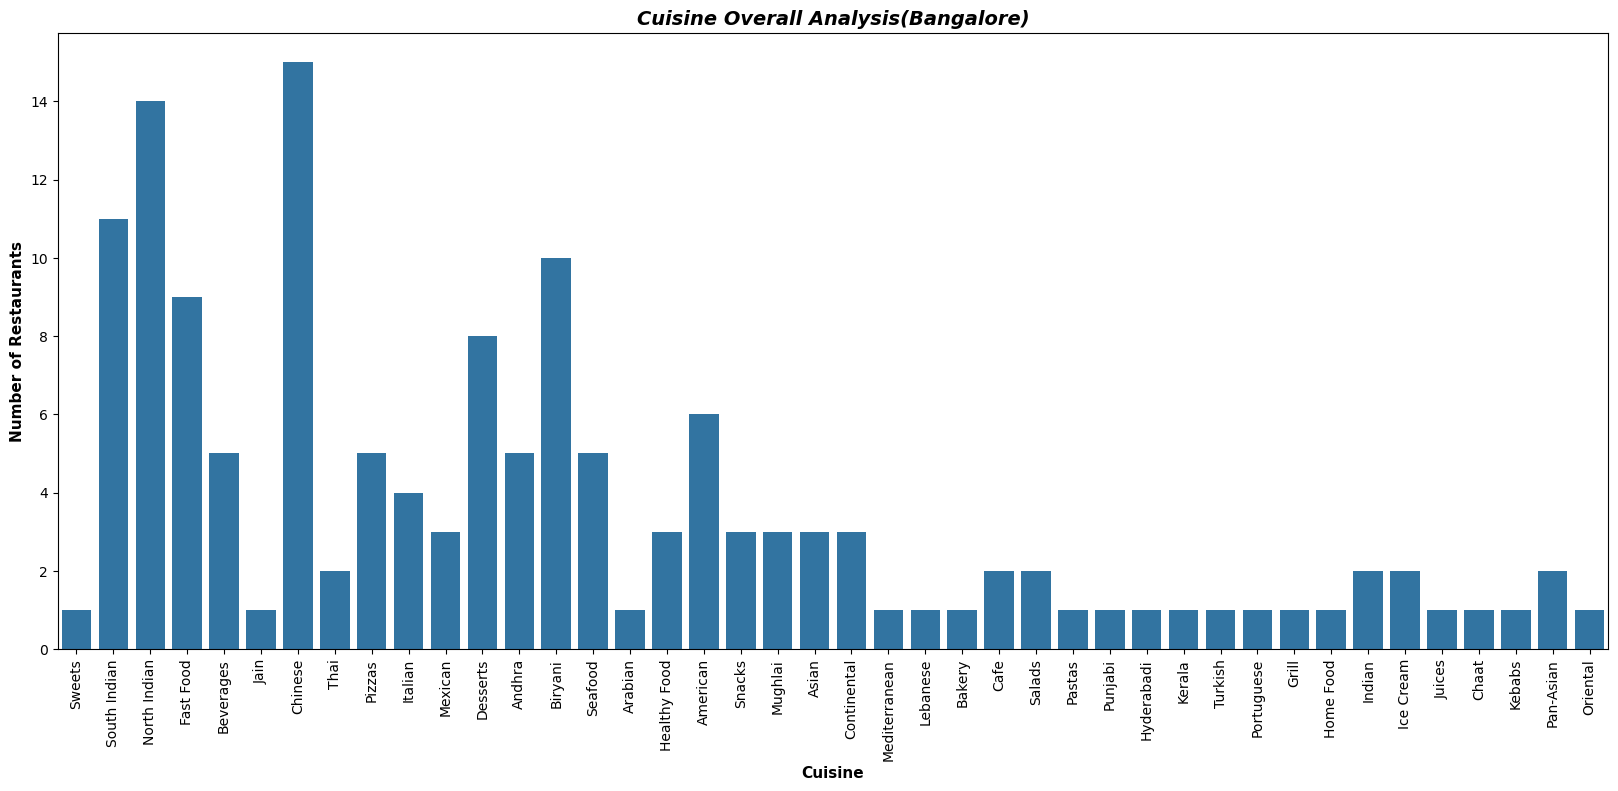

In [134]:
plt.figure(figsize=(20,8))
sns.barplot(
    x=swiggy_Koramangala["Cuisine"],
    y=swiggy_Koramangala["Count"],
    data=swiggy_Koramangala,
)
plt.xticks(rotation=90)
plt.title("Cuisine Overall Analysis(Bangalore)",
          fontsize=14,
          fontweight="bold",
          fontstyle="italic",)
plt.xlabel("Cuisine",fontsize=11,fontweight="bold")
plt.ylabel("Number of Restaurants",fontsize=11,fontweight="bold")
plt.show()

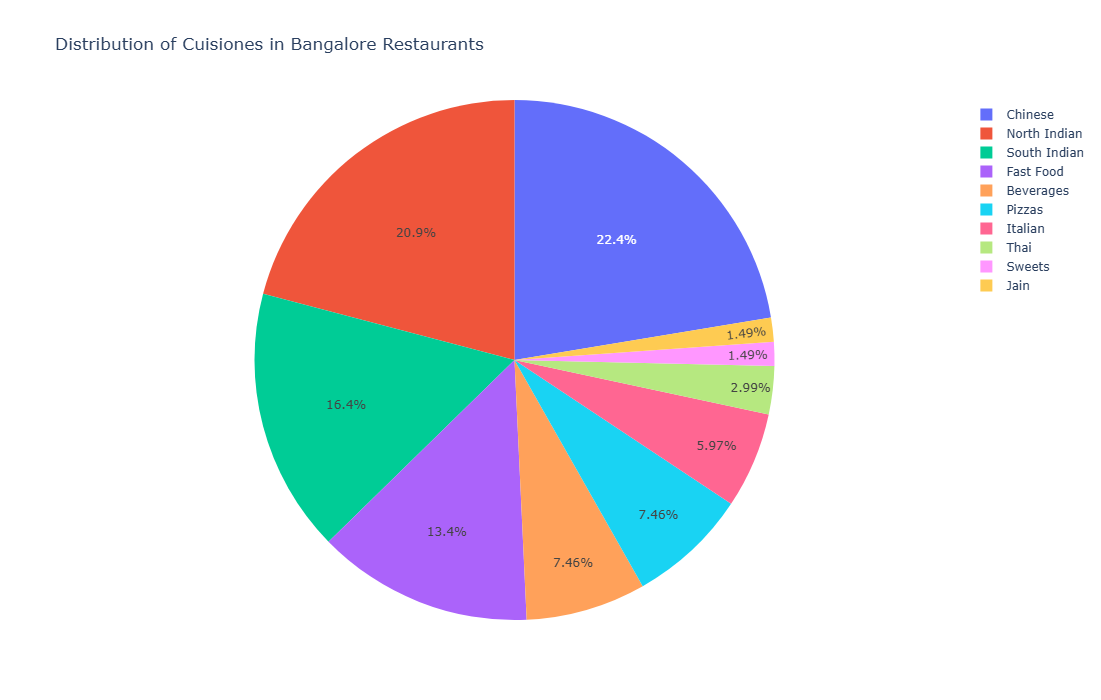

In [135]:
fig=px.pie(
    data_frame=swiggy_Koramangala,
    names=swiggy_Koramangala["Cuisine"][:10],
    values=swiggy_Koramangala["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.show()


## **Conclusion:**

- From the above Visualizations, We can say, In **Koramangala** Area, **"Chinese"** Cuisines are dominated by around **'10.3%'** followed by **"North Indian"** & **"South Indian"** Cuisines **'9.66%'** & **'7.59%'** Restaurants respectively.
- So, We can also infer that Most of the people are fond of the **"Chinese"** Cuisines.


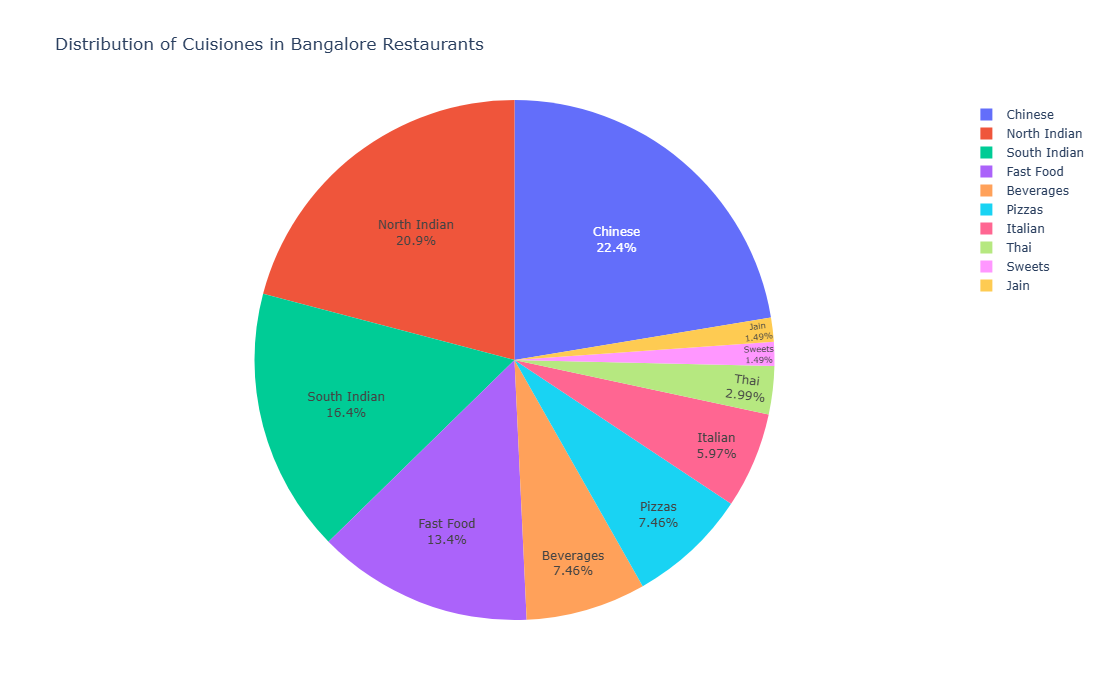

In [136]:
fig=px.pie(
    data_frame=swiggy_Koramangala,
    names=swiggy_Koramangala["Cuisine"][:10],
    values=swiggy_Koramangala["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.update_traces(textposition="inside",textinfo="percent+label")
fig.show()


## Swiggy_Hsr

In [137]:
swiggy_HSR["Cuisine"].unique()

array(['North Indian, Home Food, Thalis, Combo',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'South Indian, Kerala, Chinese, North Indian',
       'Indian, Rajasthani', 'Chinese, Jain, North Indian, South Indian',
       'North Indian, Chinese, Biryani', 'Turkish, Portuguese, American',
       'Desserts', 'South Indian', 'Andhra, Biryani', 'Desserts, Bakery',
       'Biryani, Juices, Kebabs', 'North Indian', 'Biryani',
       'Snacks, American', 'Chettinad, South Indian'], dtype=object)

In [138]:
freq_dict={}
for i in swiggy_HSR["Cuisine"].unique():
    Cuisine_List=i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine=Cuisine.lstrip(" ")
        if Cuisine in freq_dict:
            freq_dict[Cuisine]=freq_dict[Cuisine]+1
        else:
            freq_dict[Cuisine]=1
print(freq_dict)
print()
print("Total Records:\t",len(freq_dict))

{'North Indian': 6, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 4, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 4, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}

Total Records:	 24


In [139]:
Cuisine=freq_dict.keys()
freq=freq_dict.values()
swiggy_HSR=pd.DataFrame()
swiggy_HSR["Cuisine"]=Cuisine
swiggy_HSR["Count"]=freq
swiggy_HSR

,Cuisine,Count
0,North Indian,6
1,Home Food,1
2,Thalis,1
3,Combo,1
4,American,3
5,Arabian,1
6,Chinese,4
7,Desserts,3
8,Fast Food,1
9,Mughlai,1


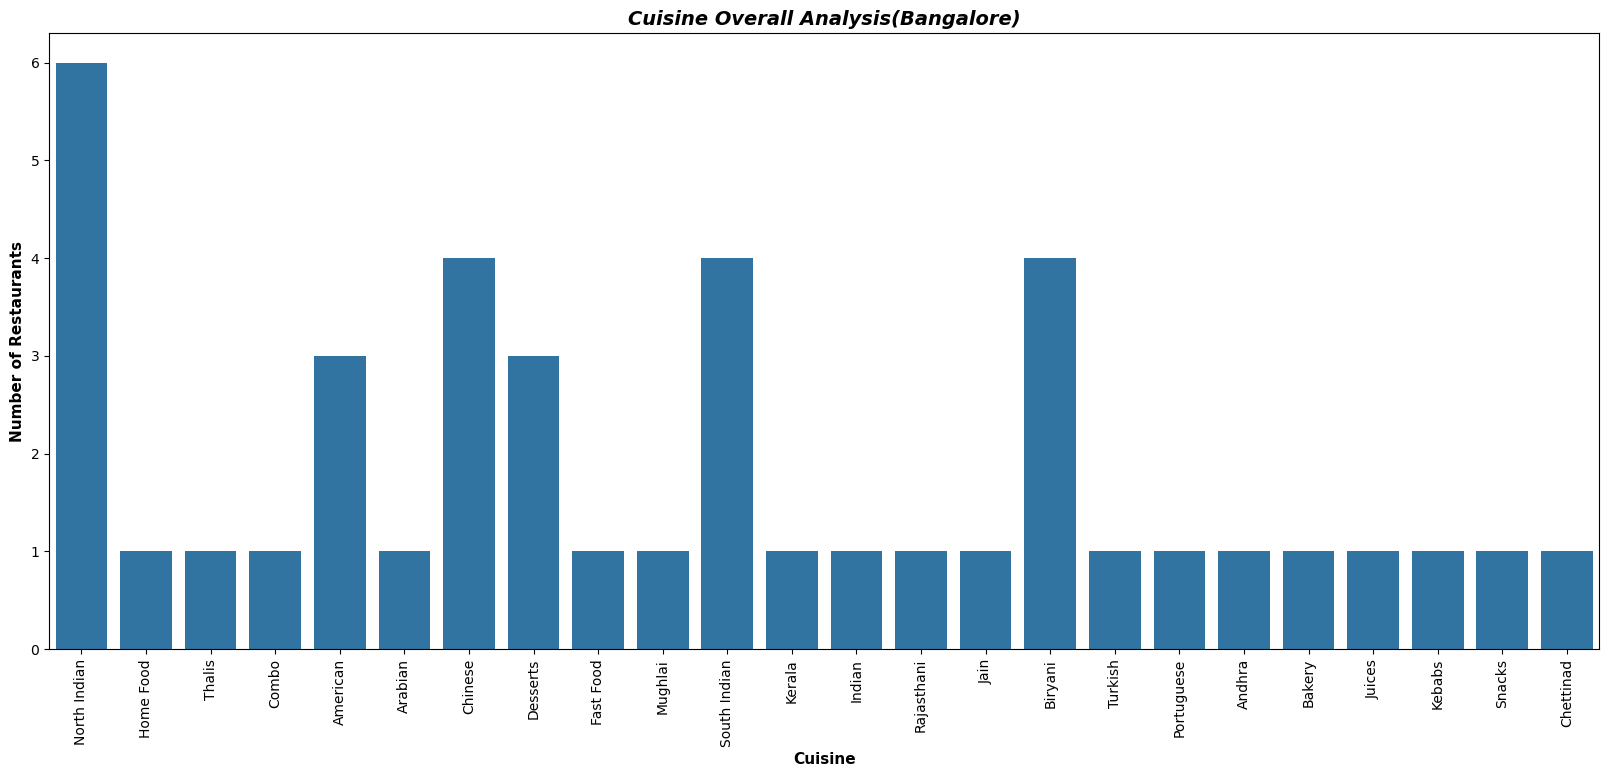

In [140]:
plt.figure(figsize=(20,8))
sns.barplot(
    x=swiggy_HSR["Cuisine"],
    y=swiggy_HSR["Count"],
    data=swiggy_HSR,
)
plt.xticks(rotation=90)
plt.title("Cuisine Overall Analysis(Bangalore)",
          fontsize=14,
          fontweight="bold",
          fontstyle="italic",)
plt.xlabel("Cuisine",fontsize=11,fontweight="bold")
plt.ylabel("Number of Restaurants",fontsize=11,fontweight="bold")
plt.show()

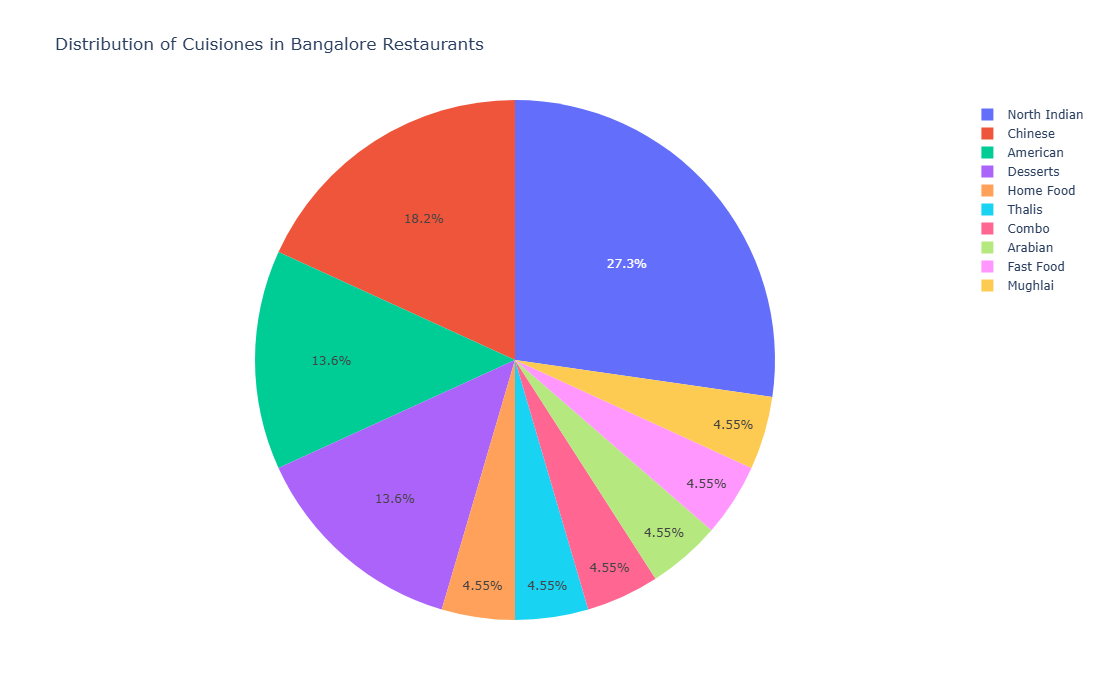

In [141]:
fig=px.pie(
    data_frame=swiggy_HSR,
    names=swiggy_HSR["Cuisine"][:10],
    values=swiggy_HSR["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.show()


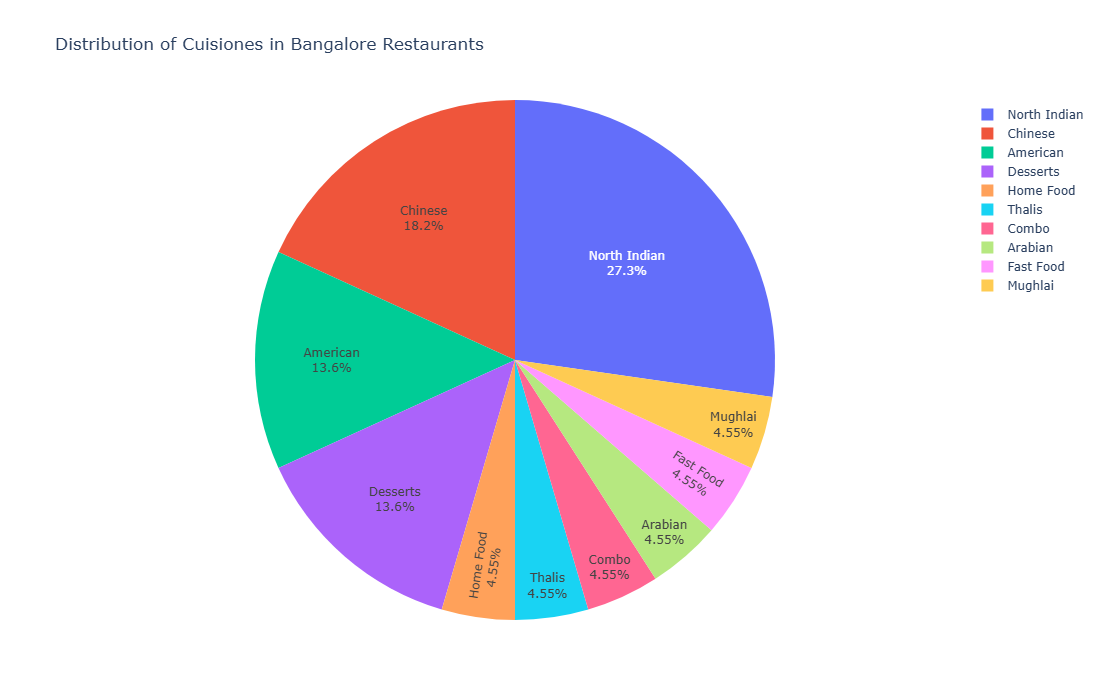

In [142]:
fig=px.pie(
    data_frame=swiggy_HSR,
    names=swiggy_HSR["Cuisine"][:10],
    values=swiggy_HSR["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.update_traces(textposition="inside",textinfo="percent+label")
fig.show()


### Area-Wise Analysis:

##### BTM Area

In [143]:
swiggy_BTM["Cuisine"].unique()

array(['Fast Food, North Indian, Chinese', 'Italian',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'North Indian', 'Desserts, Bakery',
       'North Indian, Chinese, Hyderabadi', 'Indian',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South Indian',
       'Kerala, South Indian', 'North Indian, Chinese, Biryani',
       'Biryani', 'South Indian, Snacks, North Indian, Chinese',
       'Desserts, Fast Food, Sweets, Chaat',
       'Chinese, South Indian, Andhra, Hyderabadi',
       'North Indian, Chinese, South Indian',
       'Biryani, Andhra, South Indian', 'Fast Food, Beverages',
       'Beverages, Chinese', 'Kerala, Chinese', 'North Indian, Chinese',
       'Arabian, Beverages, Biryani, Chinese, Desserts, North Indian',
       'North Indian, South Indian', 'Chinese, Thai',
       'Chinese, Hyderabadi, Biryani, Indian, South Indian, Andhra, Tandoor',
       'Punjabi, North Indian, Chinese, Fast 

In [144]:
freq_dict={}
for i in swiggy_BTM["Cuisine"].unique():
    Cuisine_List=i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine=Cuisine.lstrip(" ")
        if Cuisine in freq_dict:
            freq_dict[Cuisine]=freq_dict[Cuisine]+1
        else:
            freq_dict[Cuisine]=1
print(freq_dict)
print()
print("Total Records:\t",len(freq_dict))

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

Total Records:	 26


In [145]:
Cuisine=freq_dict.keys()
freq=freq_dict.values()
swiggy_BTM=pd.DataFrame()
swiggy_BTM["Cuisine"]=Cuisine
swiggy_BTM["Count"]=freq
swiggy_BTM

,Cuisine,Count
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10
5,Desserts,6
6,Kerala,4
7,Andhra,7
8,Beverages,4
9,Mughlai,3


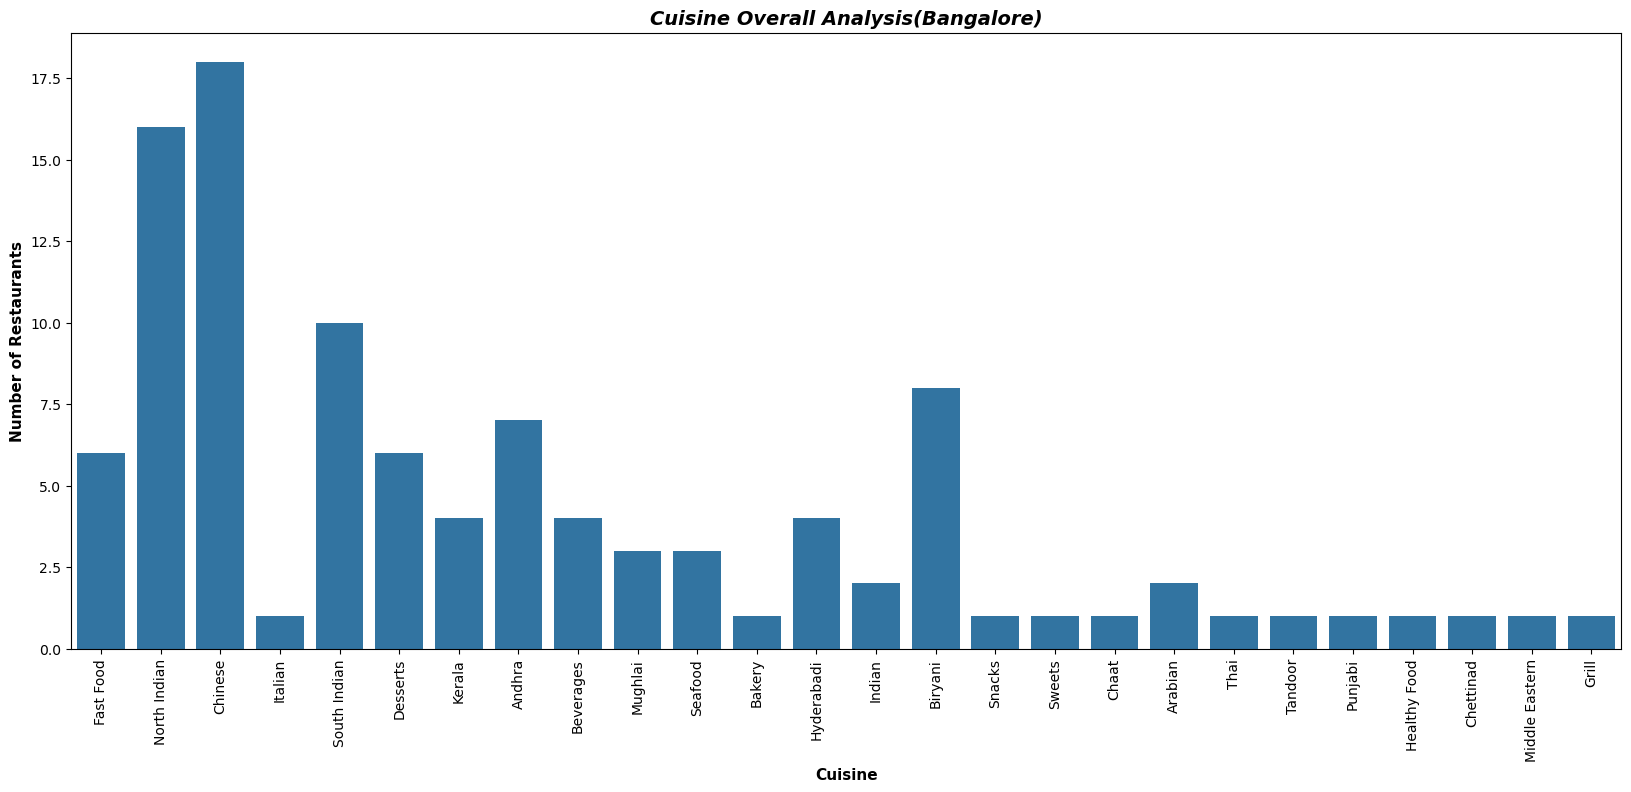

In [146]:
plt.figure(figsize=(20,8))
sns.barplot(
    x=swiggy_BTM["Cuisine"],
    y=swiggy_BTM["Count"],
    data=swiggy_BTM,
)
plt.xticks(rotation=90)
plt.title("Cuisine Overall Analysis(Bangalore)",
          fontsize=14,
          fontweight="bold",
          fontstyle="italic",)
plt.xlabel("Cuisine",fontsize=11,fontweight="bold")
plt.ylabel("Number of Restaurants",fontsize=11,fontweight="bold")
plt.show()

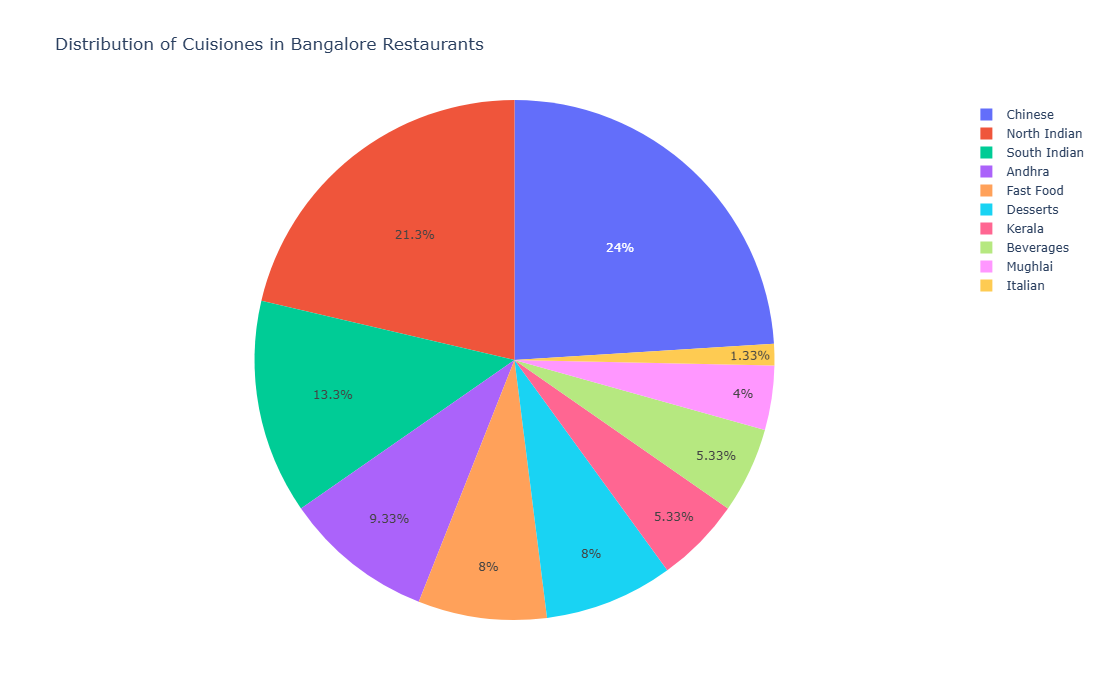

In [147]:
fig=px.pie(
    data_frame=swiggy_BTM,
    names=swiggy_BTM["Cuisine"][:10],
    values=swiggy_BTM["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.show()


## **Conclusion:**

- From the above Visualizations, We can say, In **BTM** Area, **_Most of the Resturants_** sell **"Chinese"** which is around **'17.1%'** followed by **"North Indian"** & **"South Indian"** Cuisines which are around **'15.2%'** & **'9.52%'**.
- So, We can also infer that Most of the people are fond of these Cusines.


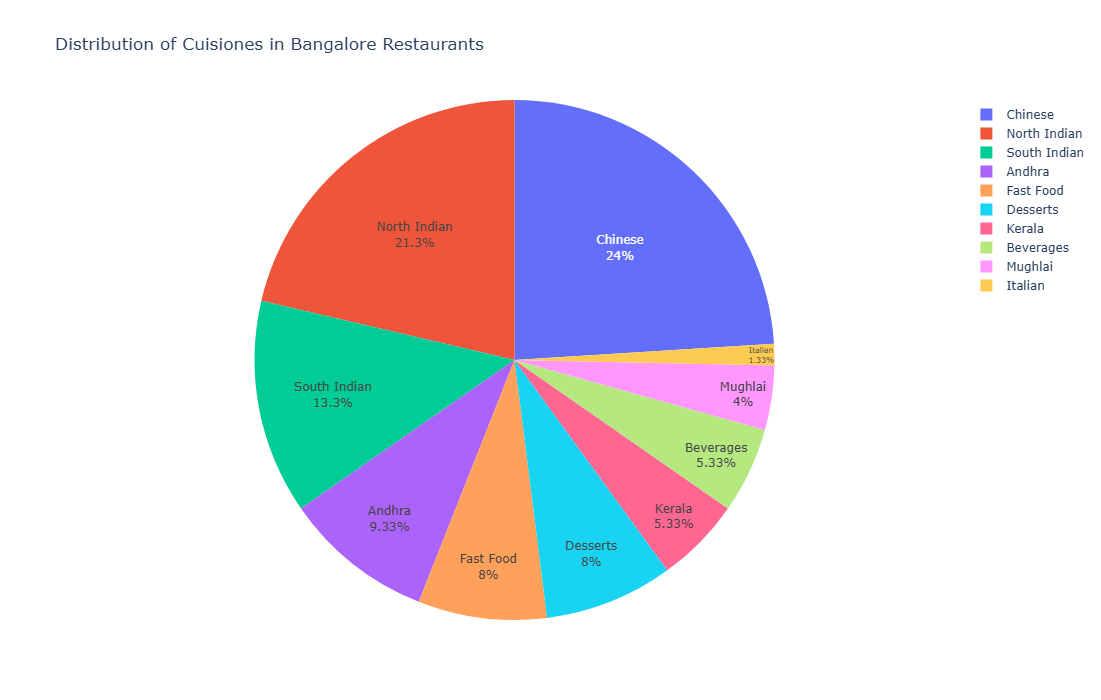

In [148]:
fig=px.pie(
    data_frame=swiggy_BTM,
    names=swiggy_BTM["Cuisine"][:10],
    values=swiggy_BTM["Count"][:10],
    title="Distribution of Cuisiones in Bangalore Restaurants",width=700,height=700
)
fig.update_traces(textposition="inside",textinfo="percent+label")
fig.show()
